In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

,Unnamed: 0,youtube_channel_id,num_of_subscribers,num_of_videos,num_of_views,avg_views,youtube_video,amount
0,0,2952.0,47900.0,100.0,3507171.0,2047.0,1.0,4000
1,1,2350.0,6180.0,78.0,509773.0,2067.0,1.0,3500
2,2,2350.0,6180.0,78.0,509773.0,2067.0,1.0,3500
3,3,3253.0,391000.0,134.0,16598945.0,72316.0,1.0,35000
4,4,2305.0,14500.0,121.0,2323655.0,255.0,1.0,4000


C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,youtube_channel_id,num_of_subscribers,num_of_videos,num_of_views,avg_views,youtube_video,amount
0,0,2952.0,47900.0,100.0,3507171.0,2047.000000,1.0,4000.0
1,1,2350.0,6180.0,78.0,509773.0,2067.000000,1.0,3500.0
2,2,2350.0,6180.0,78.0,509773.0,2067.000000,1.0,3500.0
3,3,3253.0,391000.0,134.0,16598945.0,72316.000000,1.0,35000.0
4,4,2305.0,14500.0,121.0,2323655.0,255.000000,1.0,4000.0
5,5,2151.0,23400.0,297.0,2655146.0,3698.000000,1.0,10000.0
6,6,3026.0,150000.0,370.0,21304606.0,2145.000000,1.0,8500.0
7,7,2290.0,115000.0,629.0,19976390.0,15088.000000,1.0,12500.0
9,9,1956.0,11200.0,144.0,1238034.0,1263.000000,1.0,3000.0
11,11,3393.0,57500.0,182.0,4684030.0,19395.000000,1.0,5000.0


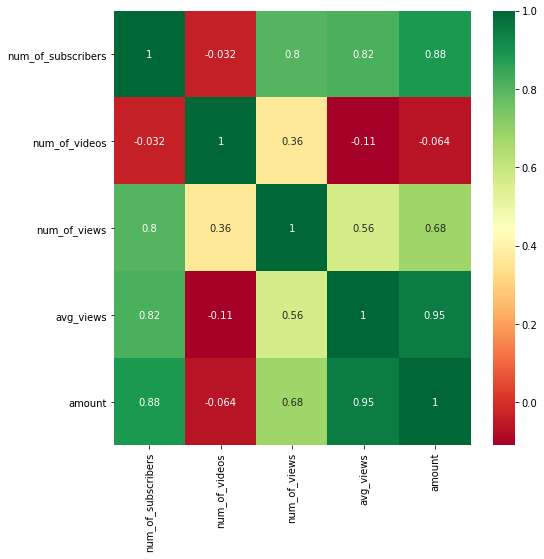

In [10]:
youtube_df = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\YoutubeData.csv')
display(youtube_df.head())
youtube_df = youtube_df[youtube_df.num_of_subscribers !=0]
youtube_df = youtube_df[youtube_df.avg_views !=0]
youtube_df = youtube_df[youtube_df.avg_views.notna()]

for i in youtube_df.index:
    youtube_df.amount.loc[i] = youtube_df.amount.loc[i]/youtube_df.youtube_video.loc[i]
    youtube_df.youtube_video.loc[i] =1

display(youtube_df)

youtube_cleaned_df = youtube_df[["num_of_subscribers","num_of_videos","num_of_views","avg_views","amount"]]

#Heatmap
corrmat = youtube_cleaned_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(youtube_cleaned_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
X = youtube_cleaned_df[["num_of_subscribers"]]
y = youtube_cleaned_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
subs = 17900
videos = 175
views = 4787036
avg = 1899

print("Predicted: ",model2.predict([[subs]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

Predicted:  [2011.0704386]
coefficient:  [0.1123503]
intercept:  0.0


Score:  0.9304863265543218


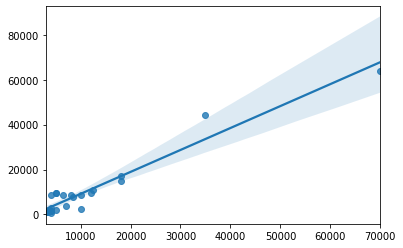

In [14]:
y_pred = model2.predict(X)
print("Score: ",model2.score(X,y))
sns.regplot(y,y_pred)

# Youtube Formulae

In [7]:
def get_units(n):
    temp_n =n
    unit=0
    while temp_n > 9:
        temp_n = round(temp_n/10)
        unit= unit+1
    return unit

def roundoff(number,digit=1):
    temp_num = number
    temp_num = temp_num/(10**digit)
    temp_num = round(temp_num)
    return temp_num*(10**digit)

def range_it(nm):
    low_price = nm*0.9
    high_price = nm*1.1
    low_price = roundoff(low_price,get_units(low_price)-1)
    high_price = roundoff(high_price,get_units(high_price)-1)
    return low_price,high_price

In [3]:
def yt_price_1(subscribers,avg_views,videos):
    video_rate = (0.04514696*subscribers)+(0.36576169*avg_views)
    if subscribers >500000:
        video_rate = (0.04514696*500000)+(0.36576169*(avg_views/subscribers)*500000)
        video_rate = video_rate*(1+((subscribers/100000)-5)*0.05)
    if videos > 2:
        return video_rate*videos*0.75
    else:
        return video_rate*videos

In [25]:
def yt_price_2(subscribers,avg_views,videos):
    video_rate = (0.42044539*subscribers)+(0.09215903*avg_views)
    if 100000<subscribers <=300000:
        video_rate = (0.42044539*100000)+(0.09215903*(avg_views/subscribers)*100000)
        video_rate = video_rate*(1+((subscribers/100000)-1)*0.1)
    if 300000<subscribers<=500000:
        video_rate = (0.42044539*100000)+(0.09215903*(avg_views/subscribers)*100000)
        video_rate = video_rate*(1+((subscribers/100000)-1)*0.6)
    if 500000<subscribers<=2000000:
        video_rate = (0.42044539*100000)+(0.09215903*(avg_views/subscribers)*100000)
        video_rate = video_rate*(1+((subscribers/100000)-1)*0.6)
    if subscribers>2000000:
        video_rate = (0.42044539*500000)+(0.09215903*(avg_views/subscribers)*500000)
        video_rate = video_rate*(1+((subscribers/100000)-5)*0.1)
#         video_rate = video_rate*0.95
    if (avg_views/subscribers) < 0.11:
        video_rate = video_rate*0.5
    if videos > 2:
        return video_rate*videos*0.75
    else:
        return video_rate*videos

In [32]:
def yt_price_2_mod(subscribers,avg_views,videos):
    video_rate = (0.42044539*subscribers)+(0.09215903*avg_views)
    if 100000<subscribers <=300000:
        video_rate = (0.42044539*100000)+(0.09215903*(avg_views/subscribers)*100000)
        video_rate = video_rate*(1+((subscribers/100000)-1)*0.1)
    if 300000<subscribers<=500000:
        video_rate = (0.42044539*100000)+(0.09215903*(avg_views/subscribers)*100000)
        video_rate = video_rate*(1+((subscribers/100000)-1)*0.6)
    if 500000<subscribers<=2000000:
        video_rate = (0.42044539*100000)+(0.09215903*(avg_views/subscribers)*100000)
        video_rate = video_rate*(1+((subscribers/100000)-1)*0.6)
    if subscribers>2000000:
        video_rate = (0.42044539*500000)+(0.09215903*(avg_views/subscribers)*500000)
        video_rate = video_rate*(1+((subscribers/100000)-5)*0.1)
    if (avg_views/subscribers) < 0.11:
        video_rate = video_rate*0.5
    dedicated_rate = video_rate
    intregated_rate = video_rate*0.65
    cpv_dedicated =  dedicated_rate/avg_views
    cpv_intregated =  intregated_rate/avg_views
    if videos > 2:
        dedicated_rate = dedicated_rate*videos*0.75
        dedicated_low,dedicated_high = range_it(dedicated_rate)
        intregated_rate = intregated_rate*videos*0.75
        intregated_low,intregated_high = range_it(intregated_rate)
        return dedicated_low,dedicated_high,intregated_low,intregated_high,cpv_dedicated,cpv_intregated
    else:
        dedicated_rate = dedicated_rate*videos
        dedicated_low,dedicated_high = range_it(dedicated_rate)
        intregated_rate = intregated_rate*videos
        intregated_low,intregated_high = range_it(intregated_rate)
        return dedicated_low,dedicated_high,intregated_low,intregated_high,cpv_dedicated,cpv_intregated

In [44]:
subscribers = 12000000
avg_views = 7300000
videos = 1
dl,dh,il,ih,cd,ci = yt_price_2_mod(subscribers,avg_views,videos)
print(dl)
print(dh)
print(il)
print(ih)
print(cd)
print(ci)

2700000
3300000
1700000
2100000
0.4079698629423516
0.26518041091252853


In [5]:
def yt_price_3(subscribers,videos):
    video_rate = (0.1123503*subscribers)
    if subscribers >500000:
        video_rate = (0.1123503*500000)
        video_rate = video_rate*(1+((subscribers/100000)-5)*0.05)
    if videos > 2:
        return video_rate*videos*0.75
    else:
        return video_rate*videos

In [25]:
yt_price_1(6180,2067,1)
yt_pred_1 = pd.DataFrame(columns = ["num_of_subscribers","num_of_videos","num_of_views","avg_views","amount","pred_amount"])
for i in youtube_cleaned_df.index:
    push_dict= {"num_of_subscribers":youtube_cleaned_df.num_of_subscribers.loc[i],
                "num_of_videos":youtube_cleaned_df.num_of_videos.loc[i],
                "num_of_views":youtube_cleaned_df.num_of_views.loc[i],
                "avg_views":youtube_cleaned_df.avg_views.loc[i],
                "amount":youtube_cleaned_df.amount.loc[i],
                "pred_amount":yt_price_1(youtube_cleaned_df.num_of_subscribers.loc[i],youtube_cleaned_df.avg_views.loc[i],1)
    }
    yt_pred_1 = yt_pred_1.append(push_dict,ignore_index=True)
display(yt_pred_1)
yt_pred_1.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\youtube_price_1.csv')

,num_of_subscribers,num_of_videos,num_of_views,avg_views,amount,pred_amount
0,47900.0,100.0,3507171.0,2047.000000,4000.0,2911.253563
1,6180.0,78.0,509773.0,2067.000000,3500.0,1035.037626
2,6180.0,78.0,509773.0,2067.000000,3500.0,1035.037626
3,391000.0,134.0,16598945.0,72316.000000,35000.0,44102.883734
4,14500.0,121.0,2323655.0,255.000000,4000.0,747.900151
5,23400.0,297.0,2655146.0,3698.000000,10000.0,2409.025594
6,150000.0,370.0,21304606.0,2145.000000,8500.0,7556.602825
7,115000.0,629.0,19976390.0,15088.000000,12500.0,10710.512779
8,11200.0,144.0,1238034.0,1263.000000,3000.0,967.602966
9,57500.0,182.0,4684030.0,19395.000000,5000.0,9689.898178


## Template Formula

,followers,avg_views,amount
0,10000,3500,8000
1,35000,11000,17500
2,75000,24500,32500
3,130000,3700,55000


Predicted:  [24717.28878855]
coefficient:  [0.42044539 0.09215903]
intercept:  0.0
Score:  0.9866076170751747


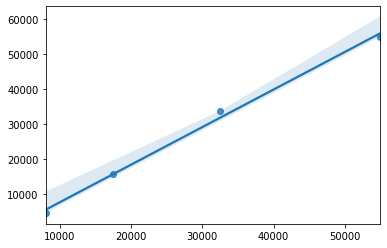

In [16]:
followers = [10000,35000,75000,130000]
avg_views = [3500,11000,24500,3700]
amount = [8000,17500,32500,55000]


youtube_template_df = pd.DataFrame(columns = ["followers", "avg_views","amount"])
youtube_template_df.followers = followers
youtube_template_df.avg_views = avg_views
youtube_template_df.amount = amount

display(youtube_template_df)

X = youtube_template_df[["followers","avg_views"]]
y = youtube_template_df["amount"].values



model3 = LinearRegression(fit_intercept=False)
model3.fit(X, y)

#Manual Check
follower = 55500
av = 15002
print("Predicted: ",model3.predict([[follower,av]]))

# Coefficients
print("coefficient: ",model3.coef_)
print("intercept: ",model3.intercept_)
print("Score: ",model3.score(X,y))

# Ploting
pred_amount = model3.predict(X)
sns.regplot(y,pred_amount)

## Transient Analysis

,subscriber,avg_views,price1,price2,price3
0,1500000,150000.0,61292.346750,201940.807710,84262.725000
1,1505000,150500.0,61394.500661,202585.299649,84403.162875
2,1510000,151000.0,61496.654572,203229.791589,84543.600750
3,1515000,151500.0,61598.808484,203874.283529,84684.038625
4,1520000,152000.0,61700.962395,204518.775468,84824.476500
...,...,...,...,...,...
195,2475000,247500.0,81212.359444,319560.586669,111648.110625
196,2480000,248000.0,81314.513355,320097.663285,111788.548500
197,2485000,248500.0,81416.667266,320634.739901,111928.986375
198,2490000,249000.0,81518.821178,321171.816517,112069.424250


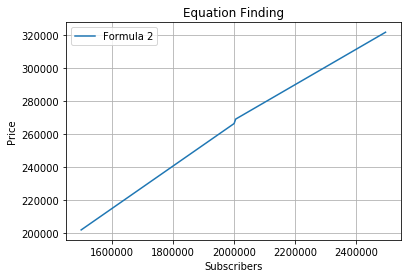

In [21]:
subscriber = list(range(1500000,2500000,5000))
price_f_1 = []
price_f_2 = []
price_f_3 = []

for i in subscriber:
    price_f_1.append(yt_price_1(i,i*0.1,1))
    price_f_2.append(yt_price_2(i,i*0.1,1))
    price_f_3.append(yt_price_3(i,1))
    
yt_transient = pd.DataFrame(columns=["subscriber","avg_views","price1","price2","price3"])
yt_transient.subscriber = subscriber
yt_transient.avg_views = [i*0.1 for i in subscriber]
yt_transient.price1 = price_f_1
yt_transient.price2 = price_f_2
yt_transient.price3 = price_f_3

display(yt_transient)

# plt.plot(subscriber, price_f_1,label="Formula 1")
plt.plot(subscriber, price_f_2,label="Formula 2")
# plt.plot(subscriber, price_f_3,label="Formula 3")

plt.xlabel('Subscribers')
plt.ylabel('Price')
plt.title('Equation Finding')
plt.legend()
plt.grid(True)
plt.show()

yt_transient.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\youtube_Three_formula.csv')

In [14]:
subscriber = 15000
avg_views_percent = 5
print("avg_views",avg_views_percent*subscriber/100)
videos = 1

print("Formula 1:",yt_price_1(subscriber,subscriber*avg_views_percent/100,videos))
print("Formula 2 (Dedicated):",yt_price_2(subscriber,subscriber*avg_views_percent/100,videos))
print("Formula 3:",yt_price_3(subscriber,videos))
print("Formula 2 (Integrated):",yt_price_2(subscriber,subscriber*avg_views_percent/100,videos)*0.65)
print("Formula 2 (CPV):",yt_price_2(subscriber,subscriber*avg_views_percent/100,videos)/(avg_views_percent*subscriber/100))

avg_views 750.0
Formula 1: 951.5256674999999
Formula 2 (Dedicated): 3187.90006125
Formula 3: 1685.2545
Formula 2 (Integrated): 2072.1350398125
Formula 2 (CPV): 4.250533415


## Final Formula Transient Analysis

In [53]:
youtube_formula_transient = pd.DataFrame(columns=["subscribers","avg_views","avg_view_percent","videos","dedicated_low","dedicated_high","integrated_low","integrated_high","cpv(dedicated)","cpv(integrated)"])

for i in range(1000,100000,5000):
    for j in range(10,210,45):
        num_videos = 1
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        num_videos = 4
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
    
    
for i in range(110000,300000,10000):
    for j in range(10,210,45):
        num_videos = 1
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        num_videos = 4
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        
for i in range(350000,500000,20000):
    for j in range(10,210,45):
        num_videos = 1
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        num_videos = 4
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        
for i in range(550000,2000000,50000):
    for j in range(10,210,45):
        num_videos = 1
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        num_videos = 4
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        
for i in range(2100000,4000000,10000):
    for j in range(10,210,45):
        num_videos = 1
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        num_videos = 4
        dedicated_low,dedicated_high,integrated_low,integrated_high,cpv_dedicated,cpv_integrated = yt_price_2_mod(i,i*j/100,num_videos)
        push_dict= {"subscribers":i,
                    "avg_views":i*j/100,
                    "avg_view_percent":j,
                    "videos":num_videos,
                    "dedicated_low":dedicated_low,
                    "dedicated_high":dedicated_high,
                    "integrated_low":integrated_low,
                    "integrated_high":integrated_high,
                    "cpv(dedicated)":cpv_dedicated,
                    "cpv(integrated)":cpv_integrated}
        youtube_formula_transient = youtube_formula_transient.append(push_dict,ignore_index=True)
        
display(youtube_formula_transient)

youtube_formula_transient.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\youtube_Final_formula_Trans.csv')

,subscribers,avg_views,avg_view_percent,videos,dedicated_low,dedicated_high,integrated_low,integrated_high,cpv(dedicated),cpv(integrated)
0,1000.0,100.0,10.0,1.0,190.0,240.0,130.0,150.0,2.148306,1.396399
1,1000.0,100.0,10.0,4.0,580.0,710.0,380.0,460.0,2.148306,1.396399
2,1000.0,550.0,55.0,1.0,420.0,520.0,280.0,340.0,0.856605,0.556793
3,1000.0,550.0,55.0,4.0,1300.0,1600.0,830.0,1000.0,0.856605,0.556793
4,1000.0,1000.0,100.0,1.0,460.0,560.0,300.0,370.0,0.512604,0.333193
...,...,...,...,...,...,...,...,...,...,...
2655,3990000.0,3990000.0,100.0,4.0,3100000.0,3800000.0,2000000.0,2500000.0,0.288420,0.187473
2656,3990000.0,5785500.0,145.0,1.0,1100000.0,1400000.0,730000.0,890000.0,0.215003,0.139752
2657,3990000.0,5785500.0,145.0,4.0,3400000.0,4100000.0,2200000.0,2700000.0,0.215003,0.139752
2658,3990000.0,7581000.0,190.0,1.0,1200000.0,1500000.0,780000.0,1000000.0,0.176363,0.114636


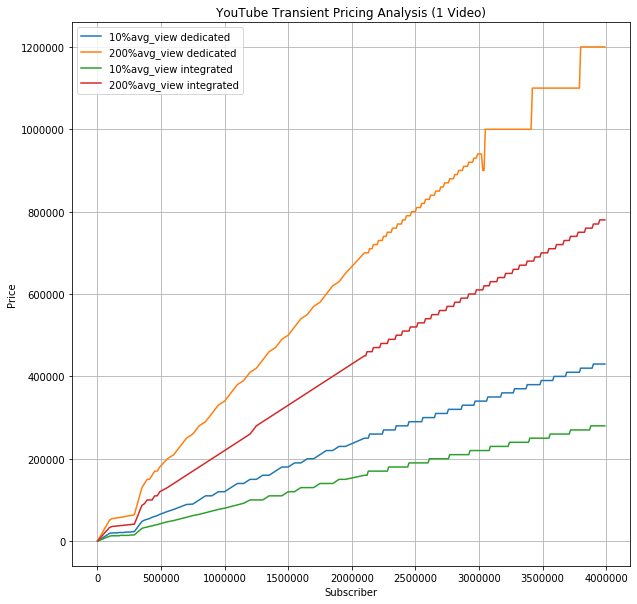

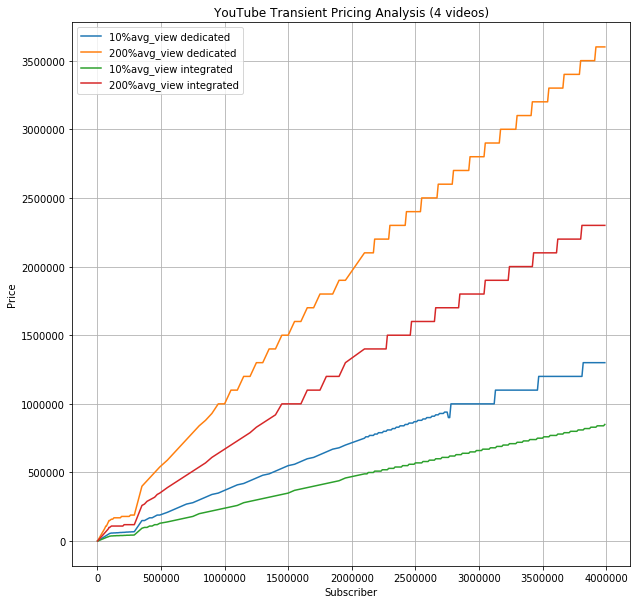

In [66]:
# Only 1 video
yt_video_1 = youtube_formula_transient[youtube_formula_transient.videos == 1]
# print(yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"])
plt.figure(figsize=(10,10))
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"].tolist(),label="10%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["dedicated_low"].tolist(),label="200%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["integrated_low"].tolist(),label="10%avg_view integrated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["integrated_low"].tolist(),label="200%avg_view integrated")


plt.xlabel('Subscriber')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('YouTube Transient Pricing Analysis (1 Video)')
plt.legend()
plt.grid(True)
plt.show()

# More than 2 videos
yt_video_1 = youtube_formula_transient[youtube_formula_transient.videos == 4]
# print(yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"])
plt.figure(figsize=(10,10))
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"].tolist(),label="10%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["dedicated_low"].tolist(),label="200%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["integrated_low"].tolist(),label="10%avg_view integrated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["integrated_low"].tolist(),label="200%avg_view integrated")


plt.xlabel('Subscriber')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('YouTube Transient Pricing Analysis (4 videos)')
plt.legend()
plt.grid(True)
plt.show()


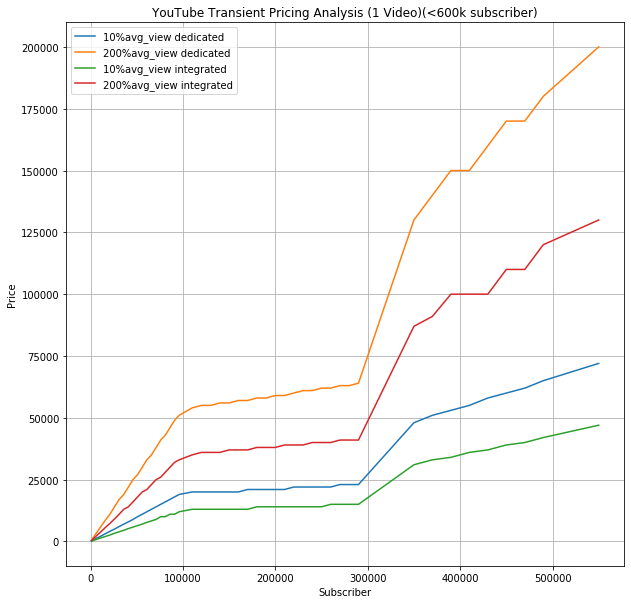

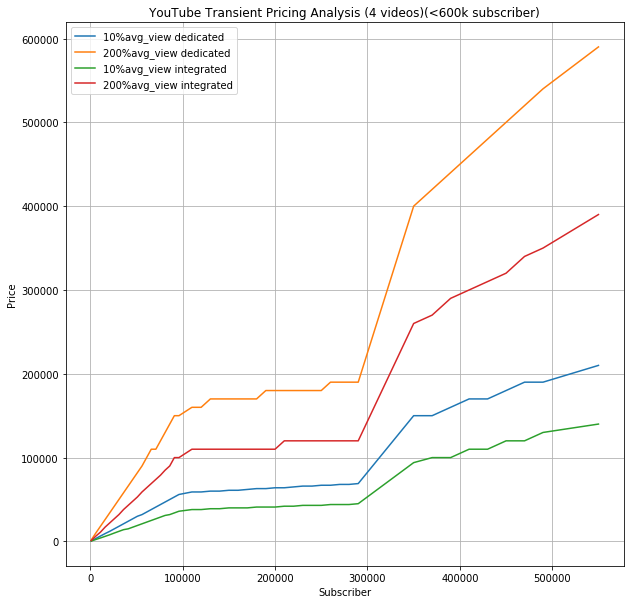

In [68]:
#Under 500k subscribers

# Only 1 video
yt_video_1 = youtube_formula_transient[youtube_formula_transient.videos == 1]
yt_video_1 = yt_video_1[yt_video_1.subscribers < 600000]
# print(yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"])
plt.figure(figsize=(10,10))
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"].tolist(),label="10%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["dedicated_low"].tolist(),label="200%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["integrated_low"].tolist(),label="10%avg_view integrated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["integrated_low"].tolist(),label="200%avg_view integrated")


plt.xlabel('Subscriber')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('YouTube Transient Pricing Analysis (1 Video)(<600k subscriber)')
plt.legend()
plt.grid(True)
plt.show()

# More than 2 videos
yt_video_1 = youtube_formula_transient[youtube_formula_transient.videos == 4]
yt_video_1 = yt_video_1[yt_video_1.subscribers < 600000]
# print(yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"])
plt.figure(figsize=(10,10))
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["dedicated_low"].tolist(),label="10%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["dedicated_low"].tolist(),label="200%avg_view dedicated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 10]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 10]["integrated_low"].tolist(),label="10%avg_view integrated")
plt.plot(yt_video_1[yt_video_1.avg_view_percent == 190]["subscribers"].tolist(), yt_video_1[yt_video_1.avg_view_percent == 190]["integrated_low"].tolist(),label="200%avg_view integrated")


plt.xlabel('Subscriber')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('YouTube Transient Pricing Analysis (4 videos)(<600k subscriber)')
plt.legend()
plt.grid(True)
plt.show()
